# Smoothing particles

In [1]:
# Libraries ----
import sys  # type: ignore
import imageio  # type: ignore
import warnings
import numpy as np  # type: ignore
import pandas as pd  # type: ignore

sys.path.append('../modules')
import track_particles as tp  # type: ignore
import plot_tracking as plt_tp  # type: ignore
import plot_smoothing as plt_sp  # type: ignore
import plot_clustering as plt_cp  # type: ignore
import smoothing_particles as sp  # type: ignore

# Global options ----
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)

## Global variables

In [2]:
input_path = "../input_files"
output_path = "../output_files"
log_path = "../logs"
input_generation_date = "2025-02-18"

ordering = True
video_name = "3n_0m_3f_240215_1"
n_particles = int(video_name[0])
save_figures = True
x_bounds = [0, 1080]
y_bounds = [60, 1860]
x_zoom = [0, 1080]
y_zoom = [0, 1920]

## Load tracked data

In [3]:
df_tracked = pd.read_csv("{}/clustered_{}.csv".format(output_path, video_name), low_memory=False)
df_tracked.head(n_particles)

,id,time,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,area,axis_major,axis_minor,eccentricity,id_count,delta_time,velocity_x,velocity_y,velocity_orientation,mask_x,mask_y,mask_orientation
0,0,0,326.092756,123.850523,340.225584,123.291935,NaN,326.092756,123.850523,NaN,326.092756,123.850523,1.545791,13293.0,251.089289,113.262957,0.892480,3,NaN,NaN,NaN,NaN,False,False,False
1,1,0,846.551843,134.850481,841.814015,134.090768,0.0,753.000000,74.000000,0.623529,846.000000,150.000000,-1.453585,17476.0,239.946347,112.797412,0.882616,3,NaN,NaN,NaN,NaN,False,False,False
2,2,0,168.210221,212.811438,168.661619,212.868119,NaN,168.210221,212.811438,NaN,168.210221,212.811438,-1.453585,7064.0,157.866614,90.080912,0.821218,3,NaN,NaN,NaN,NaN,False,False,False


In [4]:
df_tracked.tail(n_particles)

,id,time,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,area,axis_major,axis_minor,eccentricity,id_count,delta_time,velocity_x,velocity_y,velocity_orientation,mask_x,mask_y,mask_orientation
143853,0,144225,387.507886,22.595658,389.735653,23.748602,0.0,325.000000,0.000000,0.560784,325.000000,1.000000,-1.540704,5389.0,129.689538,57.870483,0.894922,3,3.0,-0.002131,-0.002301,0.000066,False,False,False
143854,1,144225,1623.923464,108.714696,1620.010799,108.825148,0.0,1652.000000,40.000000,0.384314,1625.000000,148.000000,-1.268241,8349.0,185.452446,109.859034,0.805656,3,3.0,-0.007699,-0.008153,0.000080,False,False,False
143855,2,144225,392.257978,193.022226,397.382741,200.247868,NaN,392.257978,193.022226,NaN,392.257978,193.022226,0.285711,16827.0,251.059097,112.821575,0.893339,3,3.0,0.001555,-0.002118,-0.000021,False,False,False


## Swapping mixed IDs

In [5]:
omega_threshold = 20 * np.pi / 180  # Angular velocity per frame (in degrees)
velocity_threshold = 83  # Velocity per frame limited with half average size of particle
print("Thresholds:\n\t- Velocity:", velocity_threshold, "\n\t- Angle:", omega_threshold * 180 / np.pi, "\n")
delta = 400

from importlib import reload
reload(sp)

arg_list = [
    # VIDEO 1
    [0    , 10000, velocity_threshold, omega_threshold, True],
    [10000, 20000, velocity_threshold, omega_threshold, True],
    [20000, 30000, velocity_threshold, omega_threshold, True],
    [30000, 40000, velocity_threshold, omega_threshold, True],
    [40000, 50000, velocity_threshold, omega_threshold, True],
    [50000, 60000, velocity_threshold, omega_threshold, True],
    [60000, 70000, velocity_threshold, omega_threshold, True],
    [70000, 80000, velocity_threshold, omega_threshold, True],
    [80000, 90000, velocity_threshold, omega_threshold, True],
    [90000, 100000, velocity_threshold, omega_threshold, True],
    [100000, 108000, velocity_threshold, omega_threshold, True],
    [108000, 120000, velocity_threshold, omega_threshold, True],
    [120000, 130000, velocity_threshold, omega_threshold, True],
    [130000, 144227, velocity_threshold, omega_threshold, True]
]

df_final = sp.smooth_frames(
    df_tracked=df_tracked,
    arg_list=arg_list,
    order=False,
    log_path=log_path,
    log_filename="log_{}".format(video_name),
    verbose=1,
    tqdm_bar=True
)

df_final.head(8)

Thresholds:
	- Velocity: 83 
	- Angle: 20.0 



100%|███████████████████████| 14/14 [00:44<00:00,  3.18s/it]


Time: 108000 Chunks 2 Allowed time 108000 Permutation [0 1 2]
Time: 120000 Chunks 2 Allowed time 117132 Permutation [0 1 2]
Time: 30000 Chunks 2 Allowed time 30000 Permutation [0 1 2]
Time: 60000 Chunks 2 Allowed time 60000 Permutation [0 1 2]
Time: 90000 Chunks 2 Allowed time 89991 Permutation [0 1 2]


,allowed_frame,time,smooth_chunk,id,permuted_id,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,corrected_orientation,area,axis_major,axis_minor,eccentricity,id_count,delta_time,velocity_x,velocity_y,velocity_orientation,mask_x,mask_y,mask_orientation
0,True,0,chunk_00000_10000,0,0,326.092756,123.850523,340.225584,123.291935,NaN,326.092756,123.850523,NaN,326.092756,123.850523,1.545791,1.545791,13293.0,251.089289,113.262957,0.892480,3,NaN,NaN,NaN,NaN,False,False,False
1,True,0,chunk_00000_10000,1,1,846.551843,134.850481,841.814015,134.090768,0.0,753.000000,74.000000,0.623529,846.000000,150.000000,-1.453585,-1.453585,17476.0,239.946347,112.797412,0.882616,3,NaN,NaN,NaN,NaN,False,False,False
2,True,0,chunk_00000_10000,2,2,168.210221,212.811438,168.661619,212.868119,NaN,168.210221,212.811438,NaN,168.210221,212.811438,-1.453585,-1.453585,7064.0,157.866614,90.080912,0.821218,3,NaN,NaN,NaN,NaN,False,False,False
3,True,3,chunk_00000_10000,0,0,325.919784,123.739374,339.835519,123.049245,NaN,325.919784,123.739374,NaN,325.919784,123.739374,-1.545049,-1.545049,13364.0,250.160340,113.887655,0.890359,3,3.0,-0.057657,-0.037049,0.000247,False,False,False
4,True,3,chunk_00000_10000,1,1,846.362565,135.115923,841.538339,134.571516,0.0,753.000000,74.000000,0.623529,833.000000,150.000000,1.456651,-1.456651,17572.0,239.587156,113.779838,0.880040,3,3.0,-0.063092,0.088481,0.001022,False,False,True
5,True,3,chunk_00000_10000,2,2,119.812840,190.962435,120.481559,191.856761,NaN,119.812840,190.962435,NaN,119.812840,190.962435,0.272207,-0.272207,253.0,158.003779,79.173258,0.865398,3,3.0,-16.132460,-7.283001,-0.393793,False,False,False
6,True,6,chunk_00000_10000,0,0,325.779083,123.904734,339.388166,123.234782,NaN,325.779083,123.904734,NaN,325.779083,123.904734,-1.543693,-1.543693,13625.0,249.047913,113.786693,0.889525,3,3.0,-0.046901,0.055120,0.000452,False,False,False
7,True,6,chunk_00000_10000,1,1,846.355399,135.113894,841.493031,134.575468,0.0,753.000000,74.000000,0.623529,780.000000,150.000000,1.457020,-1.457020,17569.0,239.536564,113.719188,0.880122,3,3.0,-0.002389,-0.000676,0.000123,False,False,False


In [6]:
df_final.tail(5)

,allowed_frame,time,smooth_chunk,id,permuted_id,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,orientation,corrected_orientation,area,axis_major,axis_minor,eccentricity,id_count,delta_time,velocity_x,velocity_y,velocity_orientation,mask_x,mask_y,mask_orientation
143851,True,144222,chunk_130000_144227,1,1,1623.946561,108.739156,1620.051377,108.867645,0.0,1652.000000,40.000000,0.384314,1628.000000,148.000000,-1.268481,-1.268481,8346.0,185.471072,109.802921,0.805922,3,3.0,-0.025068,0.004976,0.000058,False,False,False
143852,True,144222,chunk_130000_144227,2,2,392.253313,193.028582,397.376540,200.253269,NaN,392.253313,193.028582,NaN,392.253313,193.028582,0.285775,0.285775,16829.0,251.053292,112.797738,0.893382,3,3.0,-0.001034,-0.000491,0.000075,False,False,False
143853,True,144225,chunk_130000_144227,0,0,387.507886,22.595658,389.735653,23.748602,0.0,325.000000,0.000000,0.560784,325.000000,1.000000,-1.540704,-1.540704,5389.0,129.689538,57.870483,0.894922,3,3.0,-0.002131,-0.002301,0.000066,False,False,False
143854,True,144225,chunk_130000_144227,1,1,1623.923464,108.714696,1620.010799,108.825148,0.0,1652.000000,40.000000,0.384314,1625.000000,148.000000,-1.268241,-1.268241,8349.0,185.452446,109.859034,0.805656,3,3.0,-0.007699,-0.008153,0.000080,False,False,False
143855,True,144225,chunk_130000_144227,2,2,392.257978,193.022226,397.382741,200.247868,NaN,392.257978,193.022226,NaN,392.257978,193.022226,0.285711,0.285711,16827.0,251.059097,112.821575,0.893339,3,3.0,0.001555,-0.002118,-0.000021,False,False,False


## Interpolation over not allowed frames

In [7]:
if ordering:
    df_full = df_final.copy().sort_values(["time", "permuted_id"])
    for id_ in range(len(df_full["permuted_id"].unique())):
        mask = df_full.loc[:,"permuted_id"]==df_full["permuted_id"].unique()[id_]
        df_full[mask]=df_full[mask].interpolate(method="linear")

In [8]:
if ordering:
    cols = [
        "id", "permuted_id", "time", "position_x", "position_y", "weighted_x", "weighted_y",
        "darkest_v", "darkest_x", "darkest_y", "lightest_v", "lightest_x", "lightest_y",
        "orientation", "corrected_orientation", "area", "axis_major", "axis_minor", "eccentricity"
    ]
    df_temp = df_full[cols]
    df_temp.to_csv("{}/interpolated_{}.csv".format(output_path, video_name), index=False)
    df_temp

Thresholds:
	- Velocity: 49.66414715620665 
	- Angle: 21.235281641671143 



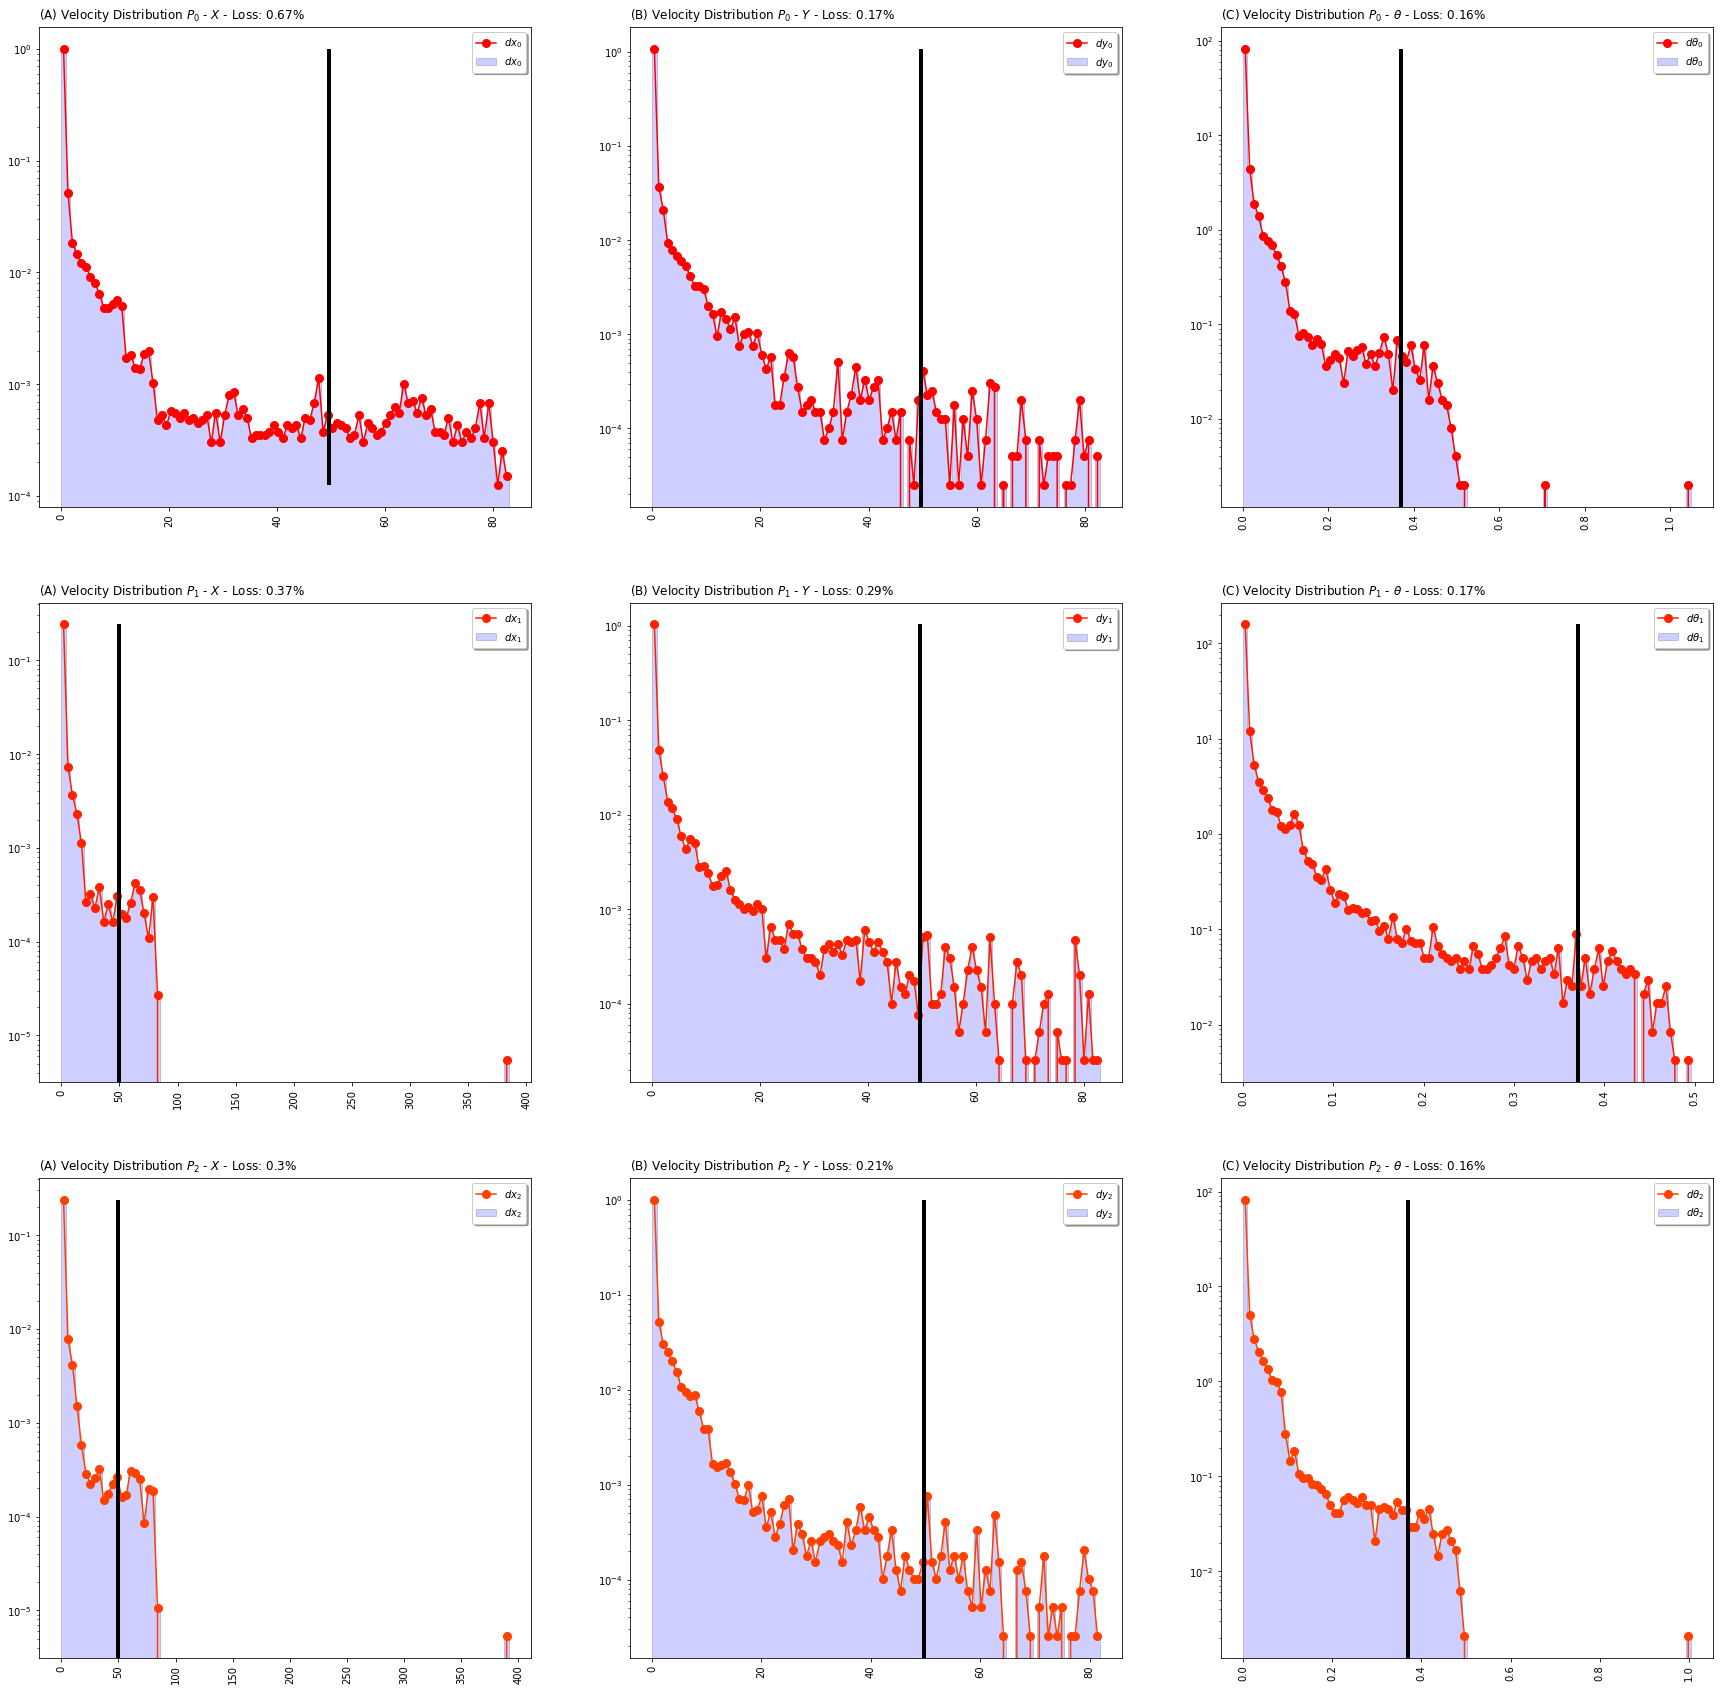

In [9]:
if ordering:
    bins = 100
    width = 10
    fancy_legend = True
    omega_threshold = df_full["velocity_orientation"].abs().quantile(0.9965) # Angular velocity per frame
    velocity_threshold = df_full["velocity_x"].abs().quantile(0.9901) # Velocity per frame limited with half average size of particle
    print("Thresholds:\n\t- Velocity:", velocity_threshold, "\n\t- Angle:", omega_threshold * 180 / np.pi, "\n")

    df_smooth = df_full.copy()
    df_smooth["id"] = df_smooth["permuted_id"]
    df_smooth["orientation"] = df_smooth["corrected_orientation"]
    plt_cp.plot_velocities_distribution(
        df_tracked=df_smooth,
        bins=bins,
        velocity_threshold=velocity_threshold,
        omega_threshold=omega_threshold,
        width=width,
        fancy_legend=fancy_legend
    )

Original


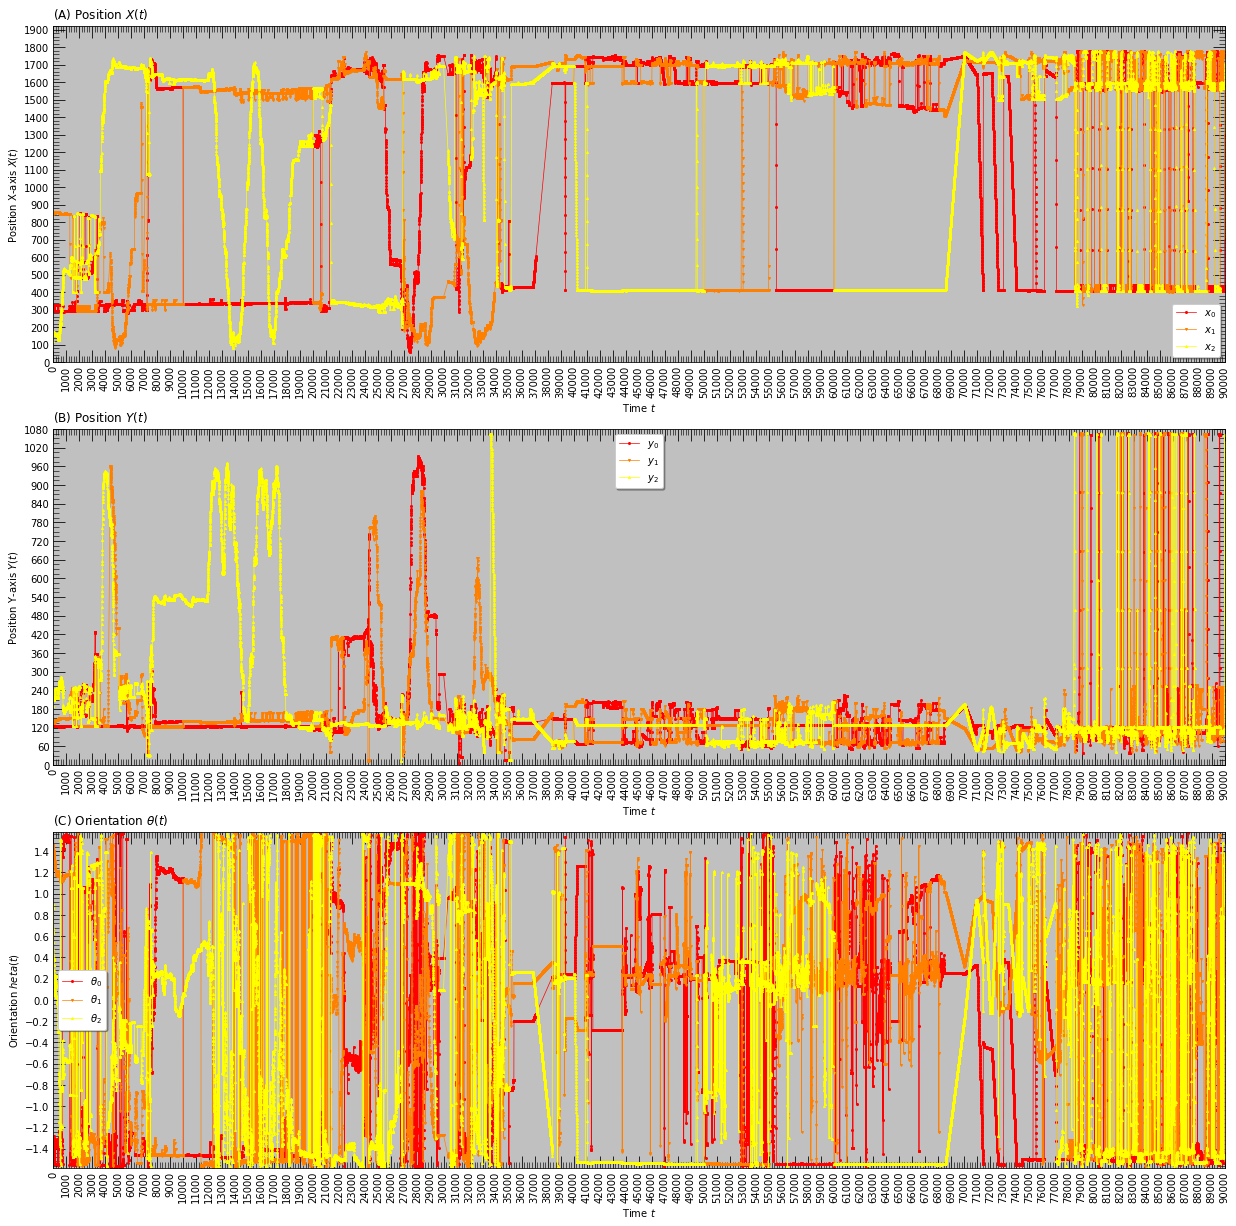

Corrected Orientation


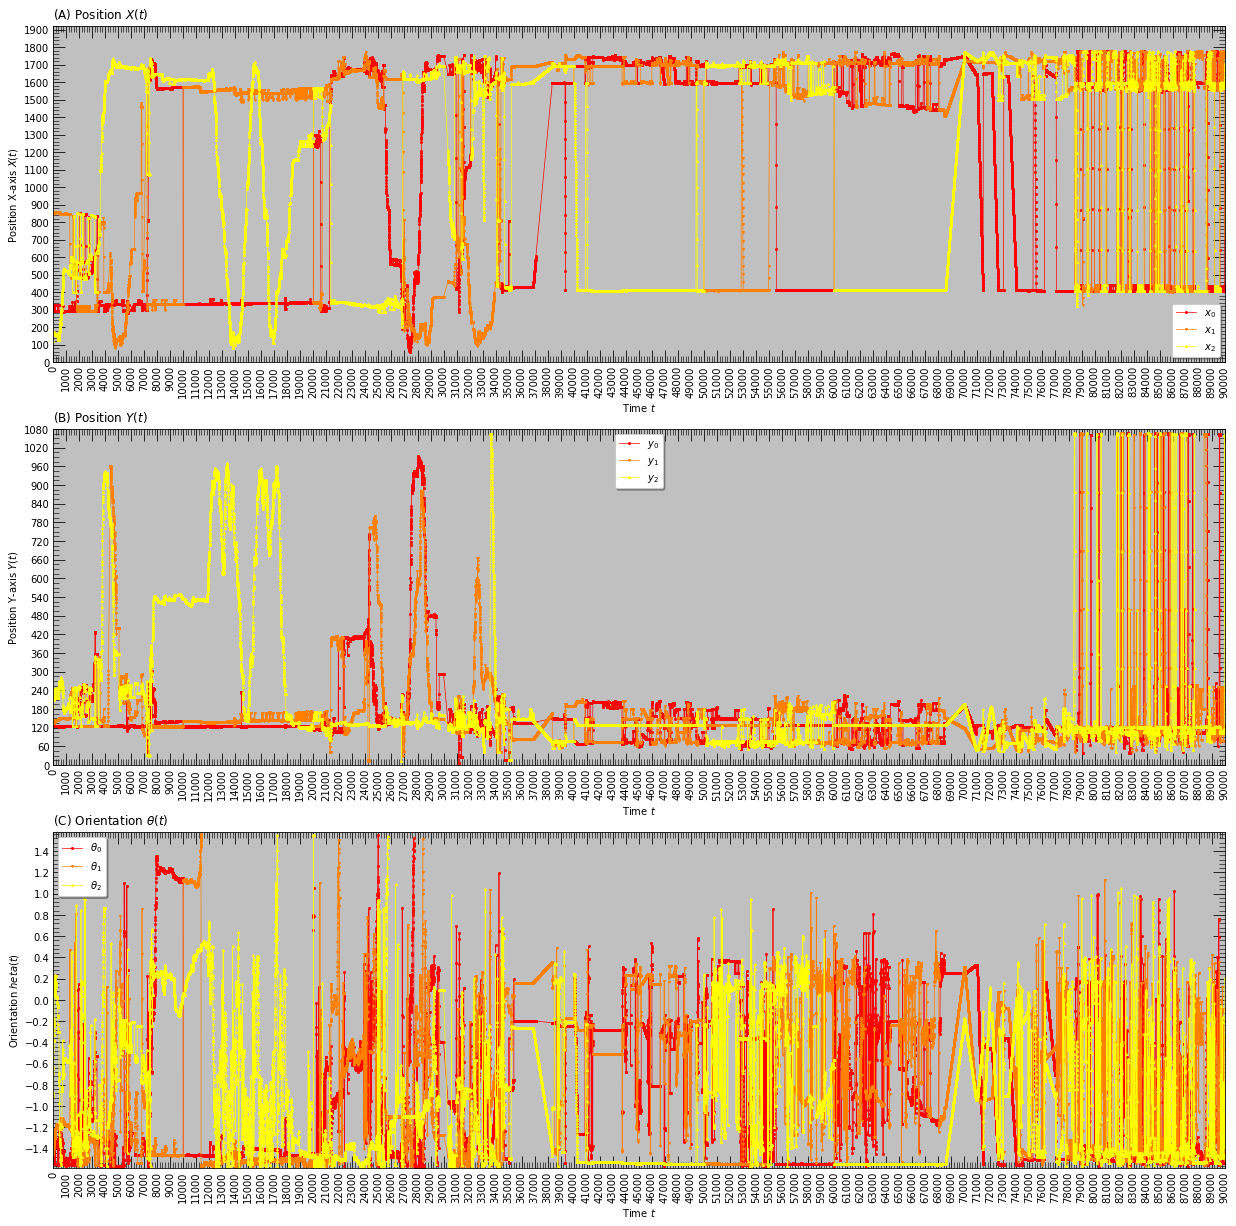

In [10]:
if ordering:
    width = 21
    n_x_breaks = 100
    n_y_breaks = 20
    t0, tf   = 0, 90000  # 22200, 24300
    t0_, tf_ = 0, 90000  # 22200, 24300
    t_bounds = [t0_, tf_]
    p_bounds = [[0, 1920], [0, 1080], [-1.58, 1.58]]
    fancy_legend = True

    print("Original")
    df_smooth = df_full.copy()
    df_smooth["id"] = df_smooth["permuted_id"]
    velocity_threshold = df_full["velocity_x"].abs().quantile(0.9701) # Velocity per frame limited with half average size of particle
    plt_sp.plot_tracking_evolution(
        df_smooth=df_smooth[((df_smooth["velocity_x"] <= velocity_threshold) & (df_smooth["velocity_y"] <= velocity_threshold))],
        width=width,
        n_x_breaks=n_x_breaks,
        n_y_breaks=n_y_breaks,
        t_bounds=[t0, tf],
        p_bounds=p_bounds,
        fancy_legend=fancy_legend
    )

    print("Corrected Orientation")
    df_smooth = df_full.copy()
    df_smooth["id"] = df_smooth["permuted_id"]
    df_smooth["orientation"] = df_smooth["corrected_orientation"]
    plt_sp.plot_tracking_evolution(
        df_smooth=df_smooth[((df_smooth["velocity_x"] <= velocity_threshold) & (df_smooth["velocity_y"] <= velocity_threshold))],
        width=width,
        n_x_breaks=n_x_breaks,
        n_y_breaks=n_y_breaks,
        t_bounds=[t0, tf],
        p_bounds=p_bounds,
        fancy_legend=fancy_legend
    )

## Setting video information

In [11]:
# # Load the video
# reader = imageio.get_reader("{}/{}.mp4".format(input_path, video_name), "ffmpeg")

# # Check the number of frames
# num_frames = reader.count_frames()
# print("Total frames: {}".format(num_frames))

# # Extract a frame to inspect the content
# time = 0
# frame = reader.get_data(time)
# print("Frames resolution: {} x {}".format(frame.shape[0], frame.shape[1]))

## Comparative of process

In [12]:
# # Original frame
# time = 209  #271  # 209  # 80
# times = [time - 1, time, time + 1]
# reinforce_boundaries = True
# remove_holes = False
# type = "local equalized"
# clip_limit = 0.05
# threshold = 0.19
# sigma = 1.5
# x_bounds = x_bounds  # [40, 1020]
# y_bounds = y_bounds  # [160, 1740]
# region_area_min = 200
# axis_major_min = 94
# eccentricity_max = 0.99


# df_tracked_frame_0 = tp.process_frame(
#     reinforce_boundaries=reinforce_boundaries,
#     remove_holes=remove_holes,
#     type=type,
#     clip_limit=clip_limit,
#     threshold=threshold,
#     sigma=sigma,
#     x_bounds=x_bounds,
#     y_bounds=y_bounds,
#     region_area_min=region_area_min,
#     axis_major_min=axis_major_min,
#     eccentricity_max=eccentricity_max,
#     tracking_list=[times[0], reader.get_data(times[0])]
# )

# df_tracked_frame_1 = tp.process_frame(
#     reinforce_boundaries=reinforce_boundaries,
#     remove_holes=remove_holes,
#     type=type,
#     clip_limit=clip_limit,
#     threshold=threshold,
#     sigma=sigma,
#     x_bounds=x_bounds,
#     y_bounds=y_bounds,
#     region_area_min=region_area_min,
#     axis_major_min=axis_major_min,
#     eccentricity_max=eccentricity_max,
#     tracking_list=[times[1], reader.get_data(times[1])]
# )

# df_tracked_frame_2 = tp.process_frame(
#     reinforce_boundaries=reinforce_boundaries,
#     remove_holes=remove_holes,
#     type=type,
#     clip_limit=clip_limit,
#     threshold=threshold,
#     sigma=sigma,
#     x_bounds=x_bounds,
#     y_bounds=y_bounds,
#     region_area_min=region_area_min,
#     axis_major_min=axis_major_min,
#     eccentricity_max=eccentricity_max,
#     tracking_list=[times[2], reader.get_data(times[2])]
# )

# df_tracked_old = pd.concat([df_tracked_frame_0, df_tracked_frame_1, df_tracked_frame_2], ignore_index=True)

# width = 10
# n_x_breaks = 20
# n_y_breaks = 20
# fancy_legend = True
# x_legend = 1.001
# y_legend = 0.891

# df_smooth = df_full.copy()
# df_smooth["id"] = df_smooth["permuted_id"]
# df_smooth["orientation"] = df_smooth["corrected_orientation"]

# fig = plt_sp.plot_all_process_frame(
#     reader=reader,
#     times=times,
#     df_tracked=df_tracked_old,
#     df_clustered=df_tracked,
#     df_smoothed=df_smooth,
#     width=width,
#     n_x_breaks=n_x_breaks,
#     n_y_breaks=n_y_breaks,
#     x_bounds=x_bounds,
#     y_bounds=y_bounds,
#     fancy_legend=fancy_legend,
#     x_legend=x_legend,
#     y_legend=y_legend
# )